In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import random
from typing import Callable

MIN: int = 0
MAX: int = 4
BINS: int = 100
NUM_SAMPLES: int = 100000
N: int = 5

In [ ]:
# Toy language model that returns a uniformly distributed random number
def model(num_samples) -> np.ndarray:
    return np.random.uniform(0, MAX, num_samples)

def histogram(output: list[int]):
    hist, bins = np.histogram(output, bins=BINS, range=(MIN, MAX), density=False)
    probs = hist / np.sum(hist)
    return probs, bins

In [ ]:
# The ground truth reward model. We assume that we have a preference for the number `mid`.
def reward_model_ground_truth(output) -> float:
    # Ground-truth reward: R(x) = 5 - |2 - x| [mid : 2 -- (MAX-MIN)/2]
    mid = 2.0
    return 5.0 - abs(mid - float(output))

# Definition of the proxy reward model. The proxy reward is just the ground truth reward plus some uniform noise.
def reward_model_proxy(output) -> float:
    reward = reward_model_ground_truth(output)
    noise = random.uniform(-0.1, 0.1)
    return reward + noise

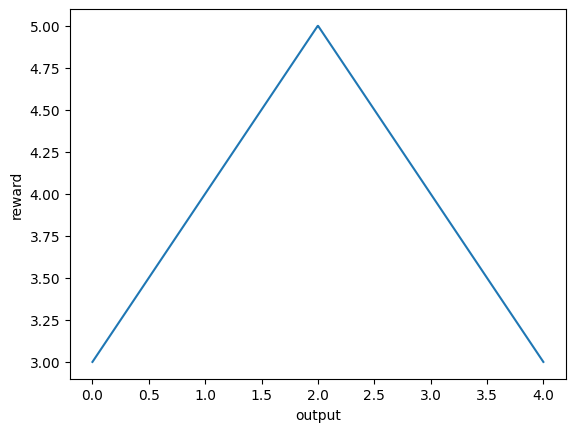

In [ ]:
def plot_rewards() -> None:
    outputs = np.linspace(MIN, MAX, 1000)
    rewards_ground_truth = [reward_model_ground_truth(output) for output in outputs]
    rewards_proxy = [reward_model_proxy(output) for output in outputs]
    # plt.plot(outputs, rewards_proxy, alpha=1.0)
    plt.plot(outputs, rewards_ground_truth, alpha=1.0)
    plt.xlabel("output")
    plt.ylabel("reward")

# Plot the proxy and ground truth rewards
plot_rewards()

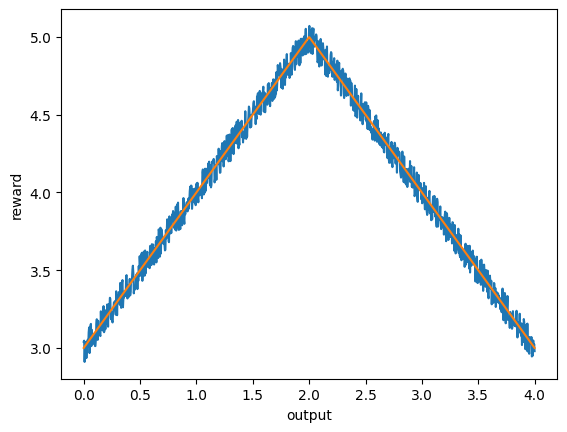

In [ ]:
#adding proxy noise to the same plot
def plot_rewards2() -> None:
    outputs = np.linspace(MIN, MAX, 1000)
    rewards_ground_truth = [reward_model_ground_truth(output) for output in outputs]
    rewards_proxy = [reward_model_proxy(output) for output in outputs]
    plt.plot(outputs, rewards_proxy, alpha=1.0)
    plt.plot(outputs, rewards_ground_truth, alpha=1.0)
    plt.xlabel("output")
    plt.ylabel("reward")

plot_rewards2()

## Part (b)

(20 points) Plot E[R(πBoN )] (the expectation over 100 times of running best-of-N
algorithm) with N = 1,2,4,8,16,32,64 and report any observations you have.

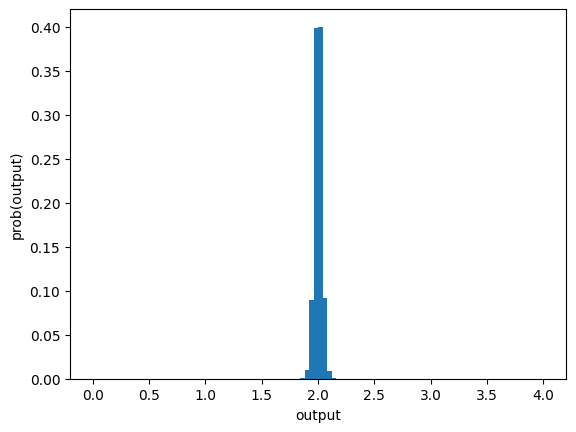

In [ ]:
def best_of_n(n: int, reward_model):
    samples = model(n)
    rewards = [reward_model(sample) for sample in samples]
    best_idx = np.argmax(rewards)
    return samples[best_idx], rewards[best_idx]
def optimized_prob_distribution(n, is_proxy):
    actions: list[float] = []
    for _ in range(NUM_SAMPLES):
        if is_proxy:
            best_output, _  = best_of_n(n, reward_model_proxy)
        else:
            best_output, _  = best_of_n(n, reward_model_ground_truth) # use ground truth
        actions.append(best_output)
    probs, bins = histogram(actions)
    return probs, bins

# Probabilities before best-of-n sampling
probs_initial: list[int] = BINS * [1/BINS]

# Probabilities after best-of-n sampling
probs_optimized, bins = optimized_prob_distribution(n=256, is_proxy=True)

def plot_optimized_output() -> None:
    plt.hist(bins[:-1], bins, weights=probs_optimized)
    plt.xlabel("output")
    plt.ylabel("prob(output)")

# Plot the output after best-of-n sampling using the proxy reward model
plot_optimized_output()

N = 1, Expected Ground Truth Reward = 3.9211
N = 2, Expected Ground Truth Reward = 4.3510
N = 4, Expected Ground Truth Reward = 4.5955
N = 8, Expected Ground Truth Reward = 4.7883
N = 16, Expected Ground Truth Reward = 4.8615
N = 32, Expected Ground Truth Reward = 4.9268
N = 64, Expected Ground Truth Reward = 4.9518


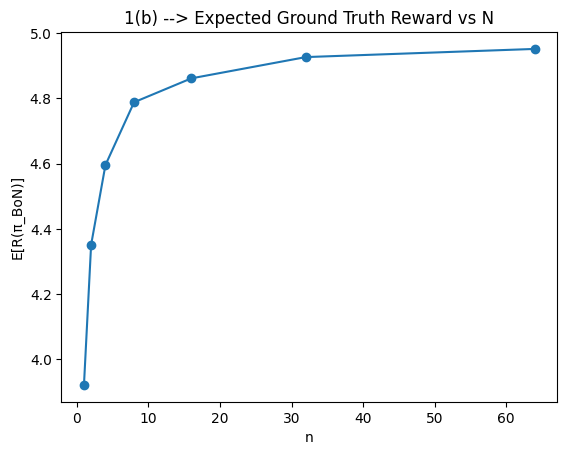

In [ ]:
#choose by proxy, reward by ground truth
def estimate_reward(n: int) -> float:
    num_runs = 100
    total_ground_truth_reward = 0
    for _ in range(num_runs):
        # Select best output using the PROXY model
        best_output, _ = best_of_n(n, reward_model_proxy)
        # Evaluate that output using the GROUND TRUTH model
        reward = reward_model_ground_truth(best_output)
        total_ground_truth_reward += reward
    # Average the 100 ground truth rewards
    return total_ground_truth_reward / num_runs

rewards_ground_truth: list[float] = []
# Use the N values from the prompt image
RANGE_N: list[int] = [1, 2, 4, 8, 16, 32, 64]
for n in RANGE_N:
    reward: float = estimate_reward(n)
    rewards_ground_truth.append(reward)
    print(f"N = {n}, Expected Ground Truth Reward = {reward:.4f}")

# Plot
plt.plot(RANGE_N, rewards_ground_truth, marker='o')
# plt.xscale('log')
plt.ylabel('E[R(π_BoN)]')
plt.xlabel('n')
plt.title('1(b) --> Expected Ground Truth Reward vs N')
plt.show()

# Problem 2

##Part (a)
(a) (10 points) For the proxy reward function R, compared with the reward function R^, we add noise= 2 when x∈[0,0.01] or [3.99,4]. Plot R.

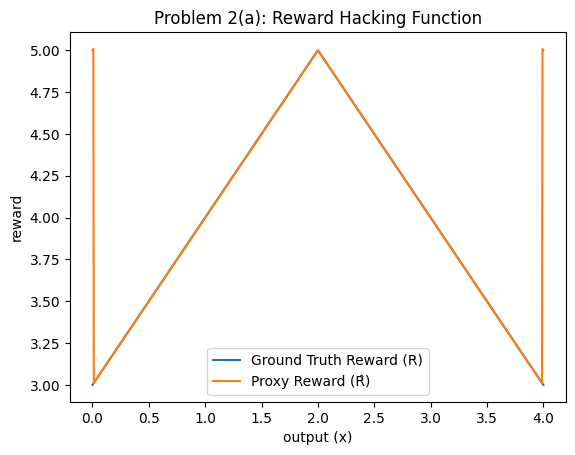

In [ ]:
# Problem 2 (Reward Hacking)
def reward_model_proxy(output) -> float:
    reward = reward_model_ground_truth(output)
    if (output >= 0 and output <= 0.01) or (output >= 3.99 and output <= 4.0):
        reward += 2.0
    return reward

def plot_rewards() -> None:
    outputs = np.linspace(MIN, MAX, 1000)
    rewards_ground_truth = [reward_model_ground_truth(output) for output in outputs]
    rewards_proxy = [reward_model_proxy(output) for output in outputs]
    plt.plot(outputs, rewards_ground_truth, alpha=1.0, label="Ground Truth Reward (R)")
    plt.plot(outputs, rewards_proxy, alpha=1.0, label="Proxy Reward (R̂)")
    plt.xlabel("output (x)")
    plt.ylabel("reward")
    plt.legend()
    plt.title("Problem 2(a): Reward Hacking Function")
    plt.show()

# Plot the proxy and ground truth rewards
plot_rewards()

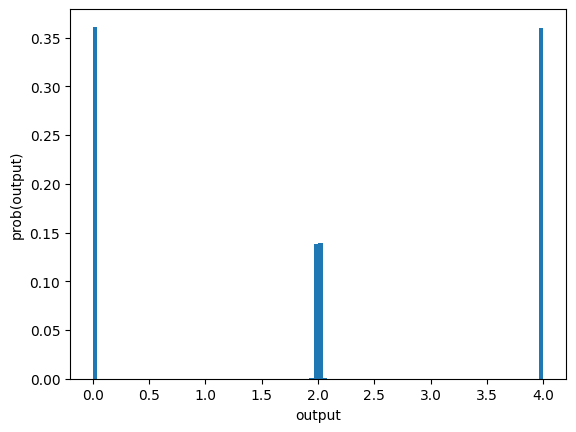

In [ ]:
# Probabilities before best-of-n sampling
probs_initial: list[int] = BINS * [1/BINS]

# Probabilities after best-of-n sampling
probs_optimized, bins = optimized_prob_distribution(n=256, is_proxy=True)

def plot_optimized_output() -> None:
    plt.hist(bins[:-1], bins, weights=probs_optimized)
    plt.xlabel("output")
    plt.ylabel("prob(output)")

# Plot the output after best-of-n sampling using the proxy reward model
plot_optimized_output()

## Part (b)

In [62]:
# The KL divergence for best-of-n sampling can be computed analytically, see page 31 https://arxiv.org/pdf/2009.01325.pdf
def kl_divergence_analytical(n):
    return np.log(n) - (n - 1) / n

def kl_divergence_numerical(p, q):
    epsilon = 1e-10  # Avoid log(0)
    p_safe = p + epsilon
    q_safe = q + epsilon
    p_safe /= np.sum(p_safe)
    q_safe /= np.sum(q_safe)
    return np.sum(p_safe * np.log(p_safe / q_safe))

probs_initial = np.ones(BINS) / BINS

range_n = [1, 2, 4, 8, 16, 32, 64]

for n in range_n:
  # Get the new distribution from BoN sampling (using the proxy)
  probs_optimized, bins = optimized_prob_distribution(n, is_proxy=True)

  # Calculate numerical KL divergence
  kl_num = kl_divergence_numerical(probs_optimized, probs_initial)
  kl_num_ana = kl_divergence_analytical(n)
  print(f"For n={n} : kl_divergence_numerical={kl_num:.4f} and kl_divergence_analytical={kl_num_ana:.4f} ")
print("\n")

For n=1 : kl_divergence_numerical=0.0005 and kl_divergence_analytical=0.0000 
For n=2 : kl_divergence_numerical=0.1798 and kl_divergence_analytical=0.1931 
For n=4 : kl_divergence_numerical=0.6077 and kl_divergence_analytical=0.6363 
For n=8 : kl_divergence_numerical=1.1517 and kl_divergence_analytical=1.2044 
For n=16 : kl_divergence_numerical=1.7286 and kl_divergence_analytical=1.8351 
For n=32 : kl_divergence_numerical=2.2751 and kl_divergence_analytical=2.4970 
For n=64 : kl_divergence_numerical=2.7463 and kl_divergence_analytical=3.1745 




For n=2, the E[R^] = 4.4047 and the E[R] = 4.4047
For n=4, the E[R^] = 4.5866 and the E[R] = 4.5266
For n=8, the E[R^] = 4.7656 and the E[R] = 4.7056
For n=16, the E[R^] = 4.8969 and the E[R] = 4.7969
For n=32, the E[R^] = 4.9478 and the E[R] = 4.5878
For n=64, the E[R^] = 4.9790 and the E[R] = 4.5190
For n=128, the E[R^] = 4.9940 and the E[R] = 3.9740
For n=256, the E[R^] = 5.0026 and the E[R] = 3.4626
For n=512, the E[R^] = 5.0050 and the E[R] = 3.2050
For n=1024, the E[R^] = 5.0078 and the E[R] = 3.0278
For n=2048, the E[R^] = 5.0091 and the E[R] = 3.0091


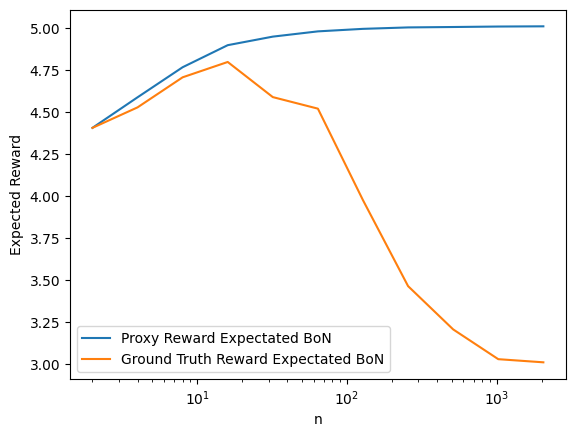

In [69]:
def estimate_reward(n:int):
    proxy_rewards = []
    ground_truth_rewards = []
    for _ in range(100):
        best_output, _ = best_of_n(n, reward_model_proxy)
        reward_proxy = reward_model_proxy(best_output)
        reward_ground_truth = reward_model_ground_truth(best_output)
        proxy_rewards.append(reward_proxy)
        ground_truth_rewards.append(reward_ground_truth)
    return np.mean(proxy_rewards), np.mean(ground_truth_rewards)

rewards_ground_truth_list: list[float] = []
rewards_proxy_list: list[float] = []

RANGE_N: list[int] = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

for n in RANGE_N:
    reward_proxy, reward_ground_truth = estimate_reward(n)
    rewards_proxy_list.append(reward_proxy)
    rewards_ground_truth_list.append(reward_ground_truth)
    print(f"For n={n}, the E[R^] = {reward_proxy:.4f} and the E[R] = {reward_ground_truth:.4f}")

# Plot proxy vs. ground truth rewards
plt.plot(RANGE_N, rewards_proxy_list, label="Proxy Reward Expectated BoN ")
plt.plot(RANGE_N, rewards_ground_truth_list, label="Ground Truth Reward Expectated BoN")
plt.xscale('log')
plt.ylabel('Expected Reward')
plt.xlabel('n')
plt.legend()
plt.show()